## Data Cleaning

##### Import necessary modules

In [1]:
from pyspark.sql import SparkSession
from utils.Constants import Constants
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Configure the hadoop dir path

In [2]:
BASE_PATH = 'hdfs://localhost:9000/user/hadoop'
MERGED_PATH = f'{BASE_PATH}/merged'
CLEANED_PATH = f'{BASE_PATH}/cleaned'

input path hdfs://localhost:9000/user/hadoop/inputs , merge path hdfs://localhost:9000/user/hadoop/merged


##### Read the data that we have merged

In [3]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("Read CSV from HDFS") \
    .getOrCreate()

# Path to the CSV file on HDFS
file_path = f'{MERGED_PATH}/combined_raw_data.csv'

# Read the CSV file into a DataFrame
df = spark.read.csv(file_path, header=True ,schema=Constants.RAW_DATA_SCHEMA)

df.printSchema()
df.show(5)

24/12/22 23:37:16 WARN Utils: Your hostname, acer resolves to a loopback address: 127.0.1.1; using 192.168.0.120 instead (on interface wlp0s20f3)
24/12/22 23:37:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/22 23:37:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/12/22 23:37:17 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


root
 |-- Line#: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Water Content (m3/m3): float (nullable = true)
 |-- Solar Radiation (W/m2): float (nullable = true)
 |-- Rain (mm): float (nullable = true)
 |-- Temperature (Celcius): float (nullable = true)
 |-- RH (%): float (nullable = true)
 |-- Wind Speed (m/s): float (nullable = true)
 |-- Gust Speed (m/s): float (nullable = true)
 |-- Wind Direction (Degree): float (nullable = true)
 |-- Dew Point (Celcius): float (nullable = true)

+-----+--------+--------+---------------------+----------------------+---------+---------------------+------+----------------+----------------+-----------------------+-------------------+
|Line#|    Date|    Time|Water Content (m3/m3)|Solar Radiation (W/m2)|Rain (mm)|Temperature (Celcius)|RH (%)|Wind Speed (m/s)|Gust Speed (m/s)|Wind Direction (Degree)|Dew Point (Celcius)|
+-----+--------+--------+---------------------+----------------------+-------

##### Rename col.

In [4]:
df = df.withColumnRenamed("Date", "date") \
       .withColumnRenamed("time", "time") \
       .withColumnRenamed("Water Content (m3/m3)", "water_content") \
       .withColumnRenamed("Solar Radiation (W/m2)", "solar_radiation") \
       .withColumnRenamed("Rain (mm)", "rain") \
       .withColumnRenamed("Temperature (Celcius)", "temperature") \
       .withColumnRenamed("RH (%)", "rh") \
       .withColumnRenamed("Wind Speed (m/s)", "wind_speed") \
       .withColumnRenamed("Gust Speed (m/s)", "gust_speed") \
       .withColumnRenamed("Wind Direction (Degree)", "wind_direction") \
       .withColumnRenamed("Dew Point (Celcius)", "dew_point")
df.printSchema()

root
 |-- Line#: string (nullable = true)
 |-- date: string (nullable = true)
 |-- time: string (nullable = true)
 |-- water_content: float (nullable = true)
 |-- solar_radiation: float (nullable = true)
 |-- rain: float (nullable = true)
 |-- temperature: float (nullable = true)
 |-- rh: float (nullable = true)
 |-- wind_speed: float (nullable = true)
 |-- gust_speed: float (nullable = true)
 |-- wind_direction: float (nullable = true)
 |-- dew_point: float (nullable = true)



##### Check Null Values with PySpark DataFrame

In [5]:
columns = df.columns

for col in columns:
    null_count = df.filter(df[col].isNull()).count()
    print(f"Column {col} has {null_count} NULL values.")


Column Line# has 0 NULL values.
Column date has 0 NULL values.
Column time has 0 NULL values.
Column water_content has 0 NULL values.
Column solar_radiation has 0 NULL values.
Column rain has 0 NULL values.
Column temperature has 0 NULL values.
Column rh has 0 NULL values.
Column wind_speed has 0 NULL values.
Column gust_speed has 0 NULL values.
Column wind_direction has 0 NULL values.
Column dew_point has 0 NULL values.


##### Check the duplicate value in data set

##### Change the format date from yy/MM/dd to dd-MM-yyyy

In [6]:
df = df.withColumn("date", F.date_format(F.to_date("Date", "yy/MM/dd"), "yyyy-MM-dd"))

df.show(5)

+-----+----------+--------+-------------+---------------+----+-----------+----+----------+----------+--------------+---------+
|Line#|      date|    time|water_content|solar_radiation|rain|temperature|  rh|wind_speed|gust_speed|wind_direction|dew_point|
+-----+----------+--------+-------------+---------------+----+-----------+----+----------+----------+--------------+---------+
|    1|2021-04-01|00:00:00|       0.2534|            1.0| 0.0|      28.12|80.6|       0.0|       0.3|         149.0|     24.5|
|    2|2021-04-01|00:05:00|       0.2532|            1.0| 0.0|      28.02|81.0|       0.0|       0.0|         215.0|    24.49|
|    3|2021-04-01|00:10:00|       0.2524|            1.0| 0.0|      28.07|81.0|       0.0|       1.3|         170.0|    24.53|
|    4|2021-04-01|00:15:00|       0.2524|            1.0| 0.0|       28.1|80.8|       0.0|       1.7|         166.0|    24.52|
|    5|2021-04-01|00:20:00|       0.2524|            1.0| 0.0|      28.07|80.8|       0.3|       2.7|         1

##### Drop Line# Column

In [7]:
df = df.drop("Line#")

In [8]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- time: string (nullable = true)
 |-- water_content: float (nullable = true)
 |-- solar_radiation: float (nullable = true)
 |-- rain: float (nullable = true)
 |-- temperature: float (nullable = true)
 |-- rh: float (nullable = true)
 |-- wind_speed: float (nullable = true)
 |-- gust_speed: float (nullable = true)
 |-- wind_direction: float (nullable = true)
 |-- dew_point: float (nullable = true)



##### Creating a variable to store all the numerical columns into a list

In [9]:
numeric_columns = ["water_content", "solar_radiation", "temperature","rain", "rh", "wind_speed", "gust_speed", "dew_point","wind_direction"]
numeric_columns

['water_content',
 'solar_radiation',
 'temperature',
 'rain',
 'rh',
 'wind_speed',
 'gust_speed',
 'dew_point',
 'wind_direction']

##### Convert to pandas dataframe work with plot

In [10]:
df = df.toPandas()

##### Check data null ft heatmap

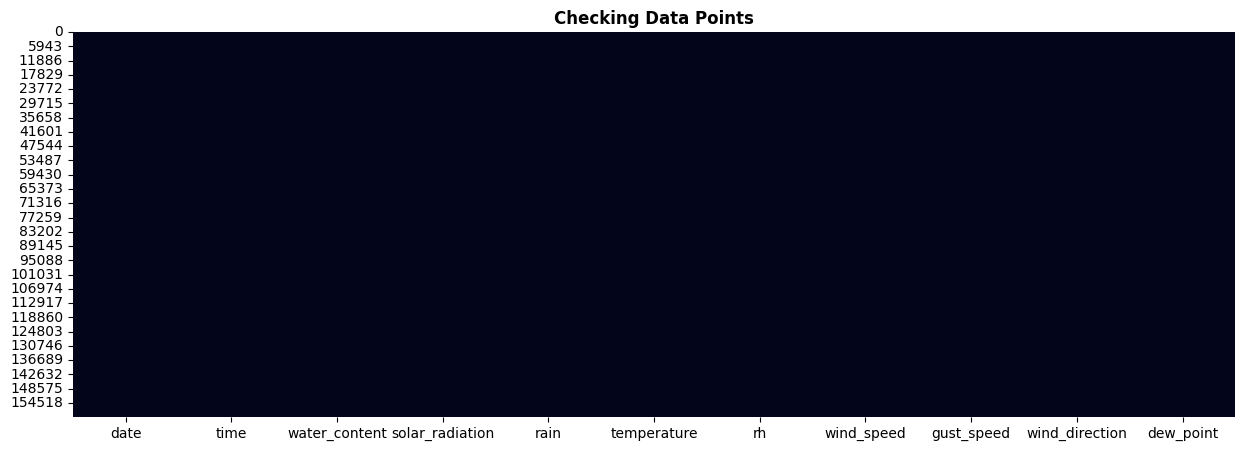

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Checking Data Points", fontweight='bold')
plt.xticks(rotation='horizontal')
plt.show()

##### Plot as boxplot to see the outlier

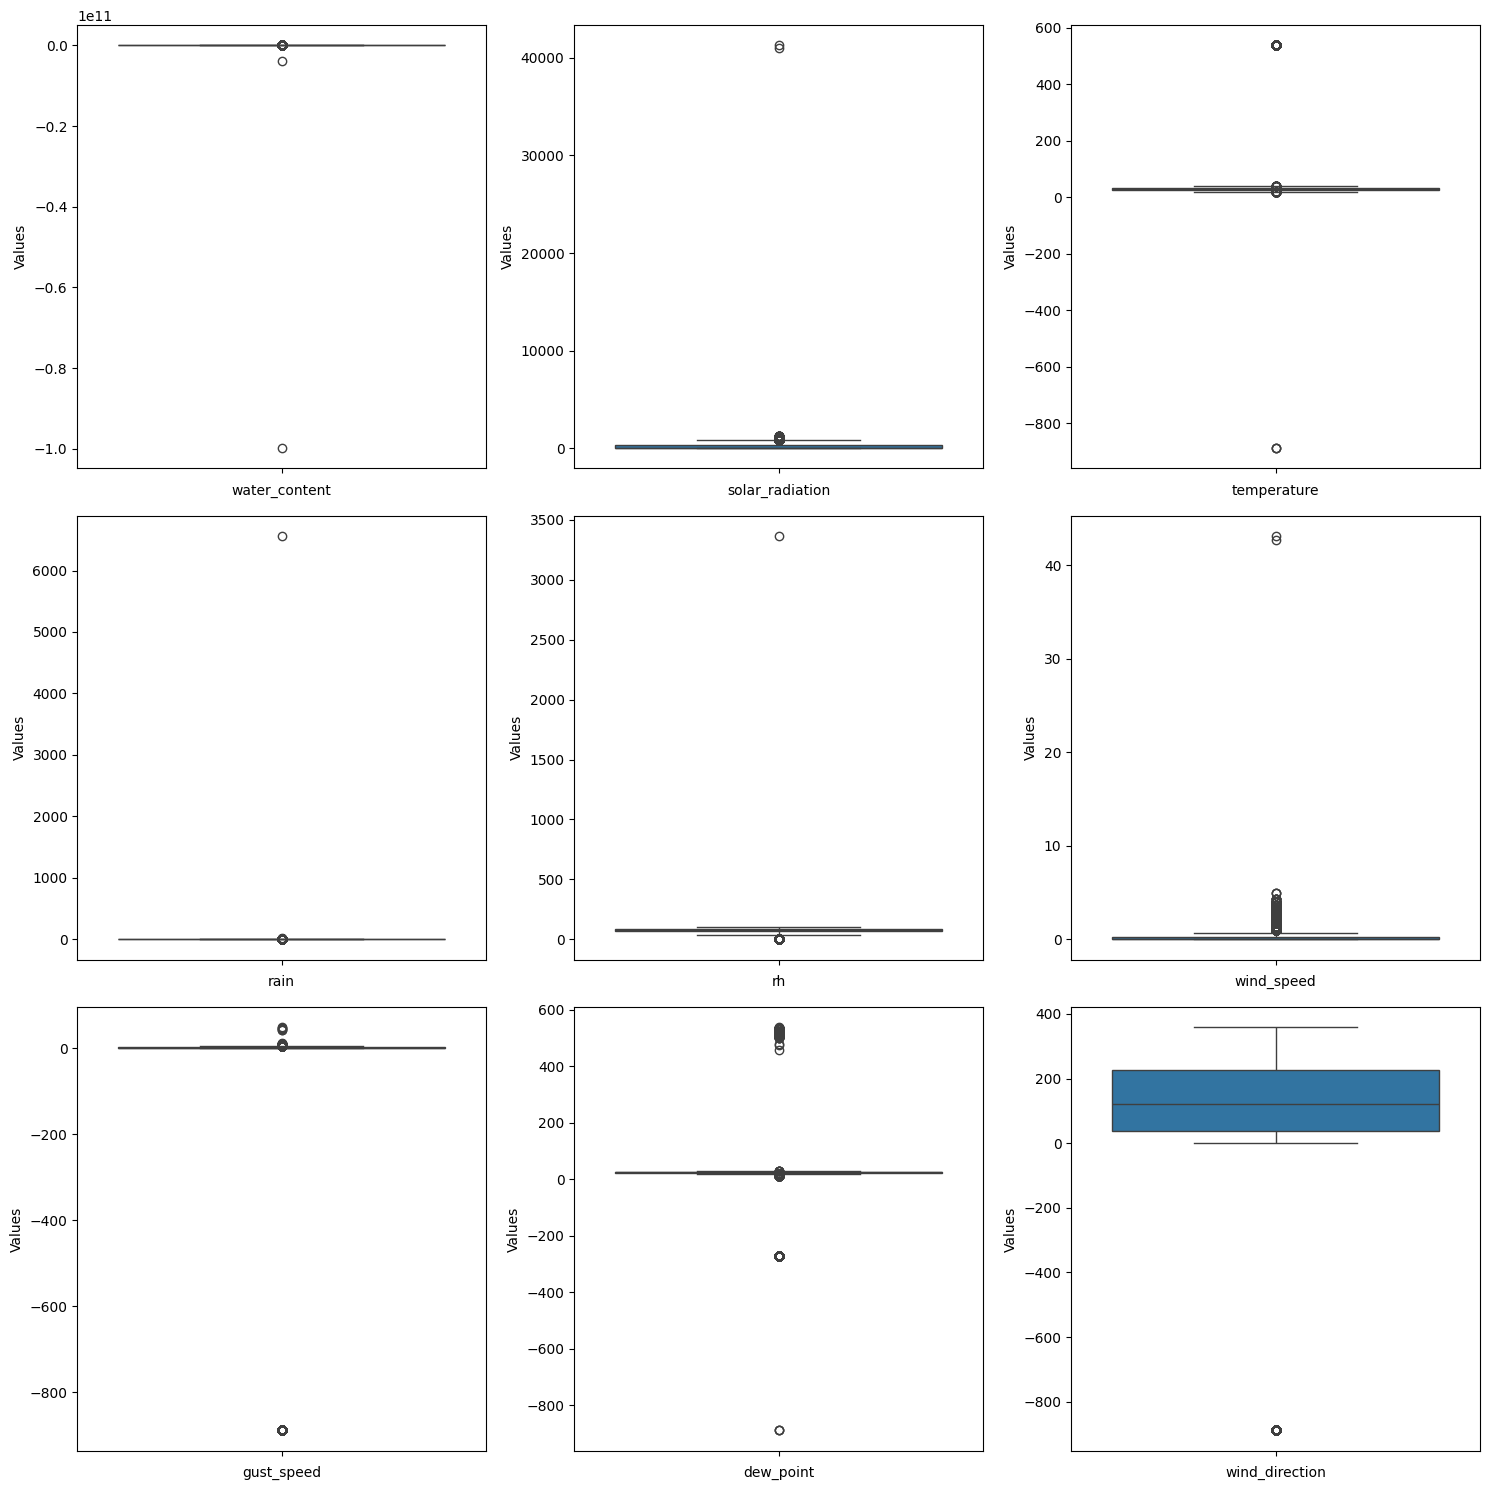

In [12]:
numeric_data = df[numeric_columns]

ncols = 3
nrows = int(np.ceil(len(numeric_columns) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=numeric_data[column], ax=axes[i])
    axes[i].set_ylabel("Values")
    axes[i].set_xlabel(column)

for i in range(len(numeric_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


##### Sort the entire dataframe asc

In [13]:
df = df.sort_values(by=numeric_columns, ascending=True)
df.head()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
154196,2021-06-08,07:55:00,-9.985051e+10,41269.0,0.000000,537.330017,0.000000,0.0,0.0,0.000000,-273.000000
153968,2021-06-07,12:55:00,-3.847092e+09,669.0,25.600000,537.330017,63.500000,2.3,5.0,-888.880005,476.790009
159666,2021-06-27,07:45:00,-4.737000e-01,1.0,6555.200195,-888.880005,0.000000,0.3,1.7,244.000000,-888.880005
51053,2022-02-03,06:00:00,-4.737000e-01,1.0,0.000000,23.590000,94.199997,0.0,0.0,27.000000,22.639999
51306,2022-02-04,03:05:00,-4.737000e-01,1.0,0.000000,23.620001,92.099998,0.0,0.0,32.000000,22.290001


##### Function to deal with outlier

In [14]:
def handle_outliers_iqr(df, columns, strategy="cap"):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if strategy == "cap":  # Capping the outliers
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        elif strategy == "remove":  # Removing the rows with outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Call the function to cap or remove outliers
df_cleaned = handle_outliers_iqr(df, numeric_columns, strategy="remove")

print("DataFrame before cut out outlier")
df_cleaned.describe()


DataFrame before cut out outlier


,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
count,109728.000000,109728.000000,109728.0,109728.000000,109728.000000,109728.000000,109728.000000,109728.000000,109728.000000
mean,0.294323,124.718643,0.0,27.885521,81.324013,0.079056,0.424554,137.629837,24.176033
std,0.022131,211.121536,0.0,2.928524,12.734738,0.189571,0.707059,101.862808,1.826002
min,0.229100,1.000000,0.0,20.219999,38.599998,0.000000,0.000000,0.000000,19.139999
25%,0.278600,1.000000,0.0,25.719999,72.500000,0.000000,0.000000,48.000000,23.139999
50%,0.291400,1.000000,0.0,27.230000,83.099998,0.000000,0.000000,133.000000,24.549999
75%,0.312500,178.250000,0.0,29.709999,92.000000,0.000000,0.700000,208.000000,25.430000
max,0.348600,821.000000,0.0,36.990002,100.000000,0.700000,2.300000,358.000000,29.150000


##### Filter out the outiler from dataframe

109728


24/12/22 23:37:34 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


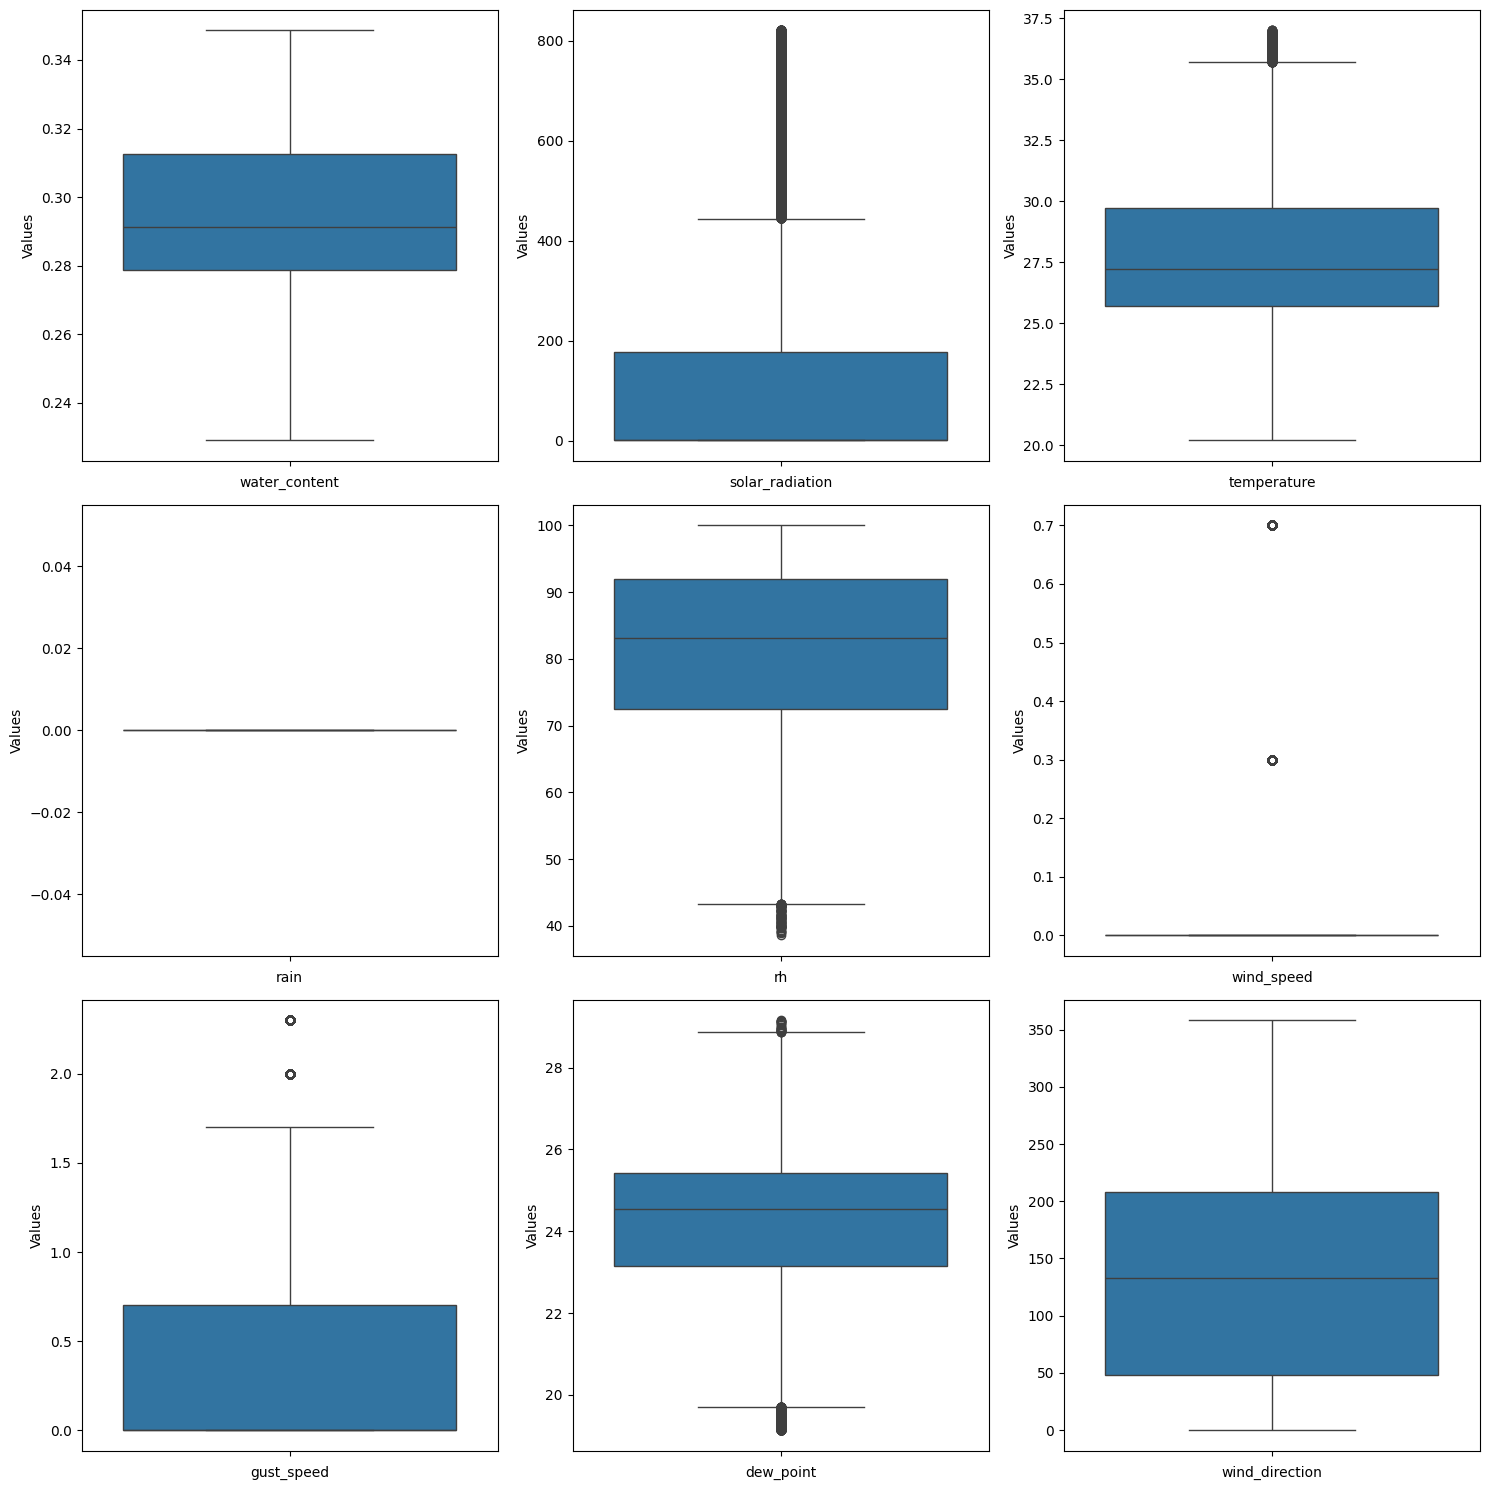

In [15]:
numeric_data = df_cleaned[numeric_columns]

print(len(df_cleaned))

ncols = 3 
nrows = int(np.ceil(len(numeric_columns) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=numeric_data[column], ax=axes[i])
    axes[i].set_ylabel("Values")
    axes[i].set_xlabel(column)

for i in range(len(numeric_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [16]:
df_cleaned.head()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
56709,2022-02-22,21:20:00,0.2291,1.0,0.0,26.430000,77.300003,0.0,0.0,29.0,22.16
56560,2022-02-22,08:55:00,0.2311,178.0,0.0,24.920000,84.099998,0.0,0.0,22.0,22.08
18935,2021-08-08,17:45:00,0.2358,2.0,0.0,29.340000,83.300003,0.0,0.0,10.0,26.24
18933,2021-08-08,17:35:00,0.2358,3.0,0.0,30.020000,82.900002,0.0,0.3,136.0,26.82
18932,2021-08-08,17:30:00,0.2358,3.0,0.0,30.190001,80.500000,0.0,0.0,72.0,26.49


##### Write it into hadoop

In [17]:
# spark = SparkSession.builder \
#     .appName("Save Cleaned DataFrame") \
#     .getOrCreate()

# # Convert Pandas DataFrame to Spark DataFrame
# df_spark = spark.createDataFrame(df_cleaned)

# df_spark.write \
#     .mode("overwrite") \
#     .option("header", "true") \
#     .option("compression", "none") \
#     .csv(f'{CLEANED_PATH}/cleaned_data.csv')

##### Verify the file write successfully

In [18]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("Read CSV from HDFS") \
    .getOrCreate()

# Path to the CSV file on HDFS
file_path = f'{CLEANED_PATH}/cleaned_data.csv'

schema = Constants.WEATHER_DATA_SCHEMA
# Read the CSV file into a DataFrame
df = spark.read.csv(file_path, header=True)

df.show(5)
df.printSchema()
df.count()



+----------+--------+-------------------+---------------+----+------------------+-----------------+-------------------+------------------+--------------+------------------+
|      date|    time|      water_content|solar_radiation|rain|       temperature|               rh|         wind_speed|        gust_speed|wind_direction|         dew_point|
+----------+--------+-------------------+---------------+----+------------------+-----------------+-------------------+------------------+--------------+------------------+
|2020-11-08|20:30:00| 0.3077000081539154|            1.0| 0.0|             28.25| 72.0999984741211|  0.699999988079071|1.7000000476837158|          65.0|22.770000457763672|
|2020-11-08|23:05:00| 0.3077000081539154|            1.0| 0.0|  27.3799991607666|75.80000305175781|0.30000001192092896| 2.299999952316284|          65.0|22.760000228881836|
|2020-11-09|01:25:00|0.30720001459121704|            1.0| 0.0|26.940000534057617|76.80000305175781|                0.0| 0.6999999880790

150946